# Part 6

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## HOPFIELD

In [3]:
x = np.array([1, 1, 0, 0])
x2=np.array([-1,-1,1,1])

In [4]:
# Step 2: Calculate the weight matrix using Hebbian learning
w1 = np.outer(x, x)  # Outer product of the pattern with itself
np.fill_diagonal(w1, 0)  # Set diagonal elements to zero to avoid self-connections
w2 = np.outer(x2,x2)
np.fill_diagonal(w2, 0)

In [5]:
print("Weight matrix W:")
print(w1)
print("Weight matrix W2:")
print(w2)

Weight matrix W:
[[0 1 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Weight matrix W2:
[[ 0  1 -1 -1]
 [ 1  0 -1 -1]
 [-1 -1  0  1]
 [-1 -1  1  0]]


In [6]:
def update_hopfield(state, W):
    return np.sign(np.dot(W, state))

# Step 4: Test the Hopfield network by recalling the stored pattern
# Define an initial state (can be the original pattern or a noisy version)
initial_state = np.array([1, 1, -1, -1])  # You can modify this to test noisy inputs

# Update the state using the Hopfield network
updated_state = update_hopfield(initial_state, w1)
updated_state2 = update_hopfield(initial_state, w2)

print("\nInitial state:")
print(initial_state)
print("\nUpdated state:")
print(updated_state)

print("\nUpdated state2:")
print(updated_state2)


Initial state:
[ 1  1 -1 -1]

Updated state:
[1 1 0 0]

Updated state2:
[ 1  1 -1 -1]


In [7]:
W = w1 + w2

# Step 4: Set the diagonal elements to zero to avoid self-connections
np.fill_diagonal(W, 0)

# Step 5: Display the final weight matrix
print("Weight matrix W:")
print(W)

Weight matrix W:
[[ 0  2 -1 -1]
 [ 2  0 -1 -1]
 [-1 -1  0  1]
 [-1 -1  1  0]]


In [8]:
updated_state3 = update_hopfield(initial_state, W)
print(updated_state3)

[ 1  1 -1 -1]


In [9]:
# Step 1: Define the weight matrix from the image
W = np.array([[0, 0, 1, -1],
              [1, 0, 1, -1],
              [1, 1, 0, -1],
              [-1, -1, -1, 0]])

In [10]:
# Step 2: Define the activation function (sign function for Hopfield networks)
def activation(x):
    return np.where(x >= 0, 1, -1)

In [11]:
# Step 3: Define a function to update the network (synchronous update)
def update_hopfield(state, W):
    return activation(np.dot(W, state))

In [12]:
# Step 4: Test the Hopfield network by recalling the stored pattern
# Define an initial state (can be the original pattern or a noisy version)
initial_state = np.array([1, 1, -1, -1])  # This can be modified for testing with noise

In [13]:
# Update the state using the Hopfield network
updated_state = update_hopfield(initial_state, W)

# Display results
print("Initial state:")
print(initial_state)
print("\nUpdated state (after applying the weight matrix):")
print(updated_state)

Initial state:
[ 1  1 -1 -1]

Updated state (after applying the weight matrix):
[ 1  1  1 -1]


In [14]:
class HopfieldNetwork:
    def __init__(self, patterns):
        # Flatten the patterns and store them
        self.patterns = np.array([p.flatten() for p in patterns])
        self.size = self.patterns.shape[1]
        self.weights = np.zeros((self.size, self.size))
        # Train network with the given patterns
        self.train()

    def train(self):
        # Hebbian learning rule for weight adjustment
        for p in self.patterns:
            self.weights += np.outer(p, p)
        np.fill_diagonal(self.weights, 0)

    def add_noise(self, pattern, noise_level):
        noisy_pattern = pattern.flatten()
        num_flips = int(noise_level * noisy_pattern.size)
        flip_indices = np.random.choice(noisy_pattern.size, size=num_flips, replace=False)
        noisy_pattern[flip_indices] *= -1
        return noisy_pattern.reshape(pattern.shape)

    def recall(self, pattern, steps=5):
        # Recall the pattern through iterative update
        pattern = pattern.flatten()
        for _ in range(steps):
            pattern = np.sign(np.dot(self.weights, pattern))
        return pattern.reshape((9, 8))

In [15]:
b = np.array([[ 1,  1,  1,  1,  1,  1,  1,  1],
    [ 1,  1,  1,  1,  1,  1,  1,  1],
    [ 1,  1,  1, 1, 1, 1, 1,  1],
    [ -1,  1,  1,  1,  1,  1,  1,  -1],
    [ -1,  -1,  -1, -1,  -1,  -1,  -1,  -1],
    [ 1,  1,  1,  1,  1,  1,  1,  1],
    [ 1,  1,  1,  1,  -1,  1,  1,  1],
    [ 1,  1,  1,  1,  1,  1,  1,  1],
    [1  ,1  ,1  ,1,1,1,1,1]])
d = np.array([[ 1,  1,  1,  1,  1,  1,  1,  1],
    [ 1,  1,  1,  -1,  -1,  1,  1,  1],
    [ 1,  1,  1, 1, -1, -1, 1,  1],
    [ 1,  1,  1,  1,  1,  -1,  -1, 1],
    [ 1,  1,  1, 1,  1,  1,  -1,  -1],
    [ 1,  1,  1,  1,  1,  -1,  -1, 1],
    [ 1,  1,  1, 1, -1, -1, 1,  1],
    [ 1,  1,  1,  -1,  -1,  1,  1,  1],
    [1,  1,  1,  1,  1,  1,  1,  1]])
k = np.array([[ 1,  1,  1,  1,  1,  1,  1,  -1],
    [ 1,  1,  1,  1,  1,  1,  -1,  1],
    [ 1,  1,  1, 1, 1, -1, 1,  1],
    [ 1,  1,  1,  1,  -1,  1,  1, 1],
    [ 1,  1,  1,  1,  -1,  1,  1, 1],
    [ 1,  1,  1,  1,  -1,  1,  1, 1],
    [ 1,  1,  1,  1,  -1,  1,  1, 1],
    [ -1,  1,  1,  1,  -1,  1,  1,  1],
    [-1,  -1,  -1,  -1,  -1,  1,  1,  1]])

In [16]:
# Create and train the Hopfield Network
hopfield_net = HopfieldNetwork([b, d, k])

In [17]:
# Add noise to the 'b' pattern and attempt to recall
noisy_b = hopfield_net.add_noise(b, noise_level=0.2)
recalled_b = hopfield_net.recall(noisy_b)
# Add noise to the 'd' pattern and attempt to recall
noisy_d = hopfield_net.add_noise(d, noise_level=0.2)
recalled_d = hopfield_net.recall(noisy_d)
# Add noise to the 'k' pattern and attempt to recall
noisy_k = hopfield_net.add_noise(k, noise_level=0.2)
recalled_k = hopfield_net.recall(noisy_k)

In [18]:
print("Noisy Pattern:\n", noisy_b)
print("Recalled Pattern:\n", recalled_b)

Noisy Pattern:
 [[-1 -1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1 -1  1]
 [-1  1  1  1  1  1  1  1]
 [ 1  1  1 -1  1 -1  1 -1]
 [-1 -1 -1  1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1 -1]
 [ 1  1  1 -1  1  1  1 -1]
 [-1  1  1  1  1 -1  1  1]
 [ 1  1  1  1  1  1  1  1]]
Recalled Pattern:
 [[ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [-1.  1.  1.  1.  1.  1.  1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1. -1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]]


In [19]:
def plot_pattern(pattern, title):
    plt.imshow(pattern, cmap='gray', interpolation='nearest')
    plt.title(title)
    plt.axis('off')
    plt.show()

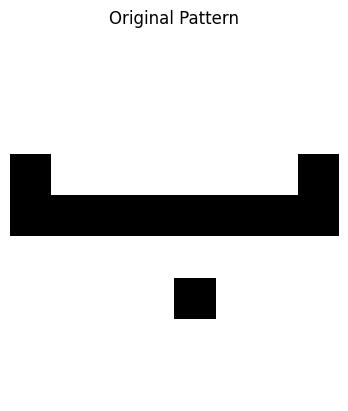

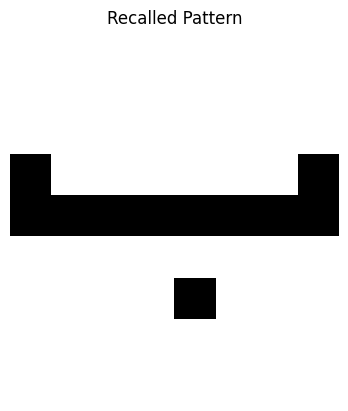

In [20]:
plot_pattern(b, "Original Pattern")
#plot_pattern(noisy_b, "Noisy Pattern")
plot_pattern(recalled_b, "Recalled Pattern")

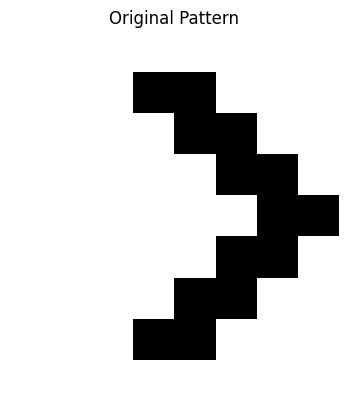

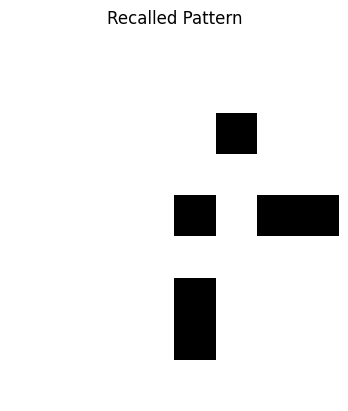

In [21]:
plot_pattern(d, "Original Pattern")
#plot_pattern(noisy_d, "Noisy Pattern")
plot_pattern(recalled_d, "Recalled Pattern")

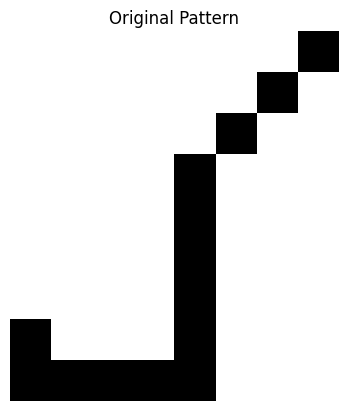

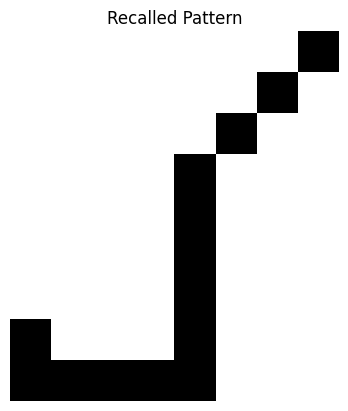

In [22]:
plot_pattern(k, "Original Pattern")
#plot_pattern(noisy_k, "Noisy Pattern")
plot_pattern(recalled_k, "Recalled Pattern")

Network successfully recalled patterns

---

## ***TAMRIN***

### Q1

In [25]:
P = np.array([[ 1,  1,  1,  1,  1,  1,  1,  1],
    [ 1,  1,  1,  1,  1,  1,  1,  1],
    [ 1,  1,  1, 1, 1, 1, 1,  1],
    [ -1,  1,  1,  1,  1,  1,  1,  -1],
    [ -1,  -1,  -1, -1,  -1,  -1,  -1,  -1],
    [ 1,  1,  1,  1,  1,  1,  1,  1],
    [ 1,  1,  1,  -1,  -1,  1,  1,  1],
    [ 1,  1,  1,  -1,  1,  1,  1,  1],
    [1  ,1  ,1  ,1,1,1,1,1]])

G = np.array([[ 1,  1,  1,  1,  -1,  1,  1,  -1],
    [ 1,  1,  1,  -1,  1,  1,  -1,  1],
    [ 1,  1,  1, 1, 1, -1, 1,  1],
    [ 1,  1,  1,  1,  -1,  1,  1, 1],
    [ 1,  1,  1,  1,  -1,  1,  1, 1],
    [ 1,  1,  1,  1,  -1,  1,  1, 1],
    [ 1,  1,  1,  1,  -1,  1,  1, 1],
    [ -1,  1,  1,  1,  -1,  1,  1,  1],
    [-1,  -1,  -1,  -1,  -1,  1,  1,  1]])

In [26]:
hopfield_net2 = HopfieldNetwork([G,P])

In [27]:
noisy_P = hopfield_net.add_noise(P, noise_level=0.4)
recalled_P = hopfield_net.recall(noisy_P)
noisy_G = hopfield_net.add_noise(G, noise_level=0.4)
recalled_G = hopfield_net.recall(noisy_G)

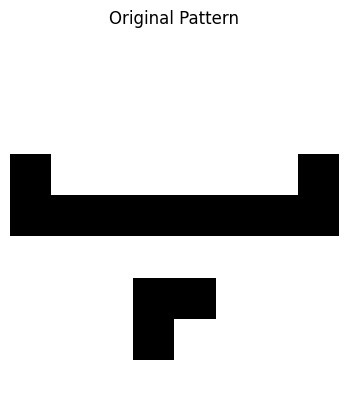

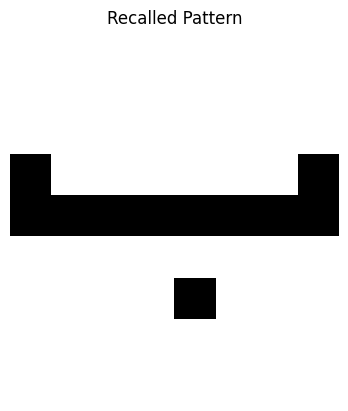

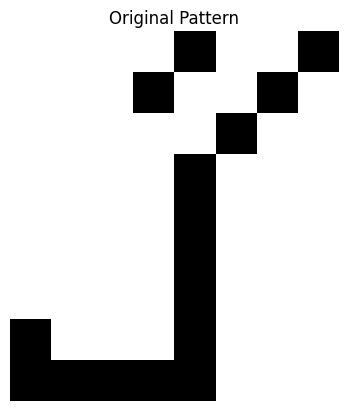

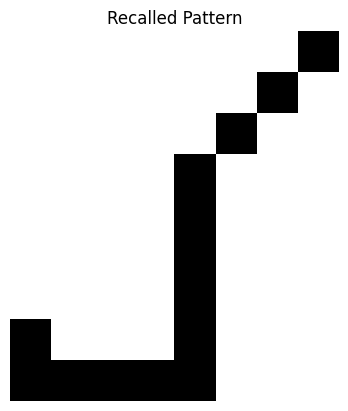

In [28]:
plot_pattern(P, "Original Pattern")
#plot_pattern(noisy_P, "Noisy Pattern")
plot_pattern(recalled_P, "Recalled Pattern")

plot_pattern(G, "Original Pattern")
#plot_pattern(noisy_G, "Noisy Pattern")
plot_pattern(recalled_G, "Recalled Pattern")

### number recalling

#### Define the Hopfield Network Class

In [125]:
class HopfieldNW:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))

    def train(self, patterns):
        for p in patterns:
            self.weights += np.outer(p, p)
        np.fill_diagonal(self.weights, 0)

    def recall(self, pattern, steps=10):
        for _ in range(steps):
            updated_pattern = pattern.copy()
            for i in range(self.size):
                raw_value = np.dot(self.weights[i], pattern)
                updated_pattern[i] = 1 if raw_value >= 0 else -1
            if np.array_equal(updated_pattern, pattern):
                break
            pattern = updated_pattern
        return pattern

    def recognize_pattern(self, recalled_pattern, patterns):
        similarities = [np.sum(recalled_pattern == p) for p in patterns]
        recognized_index = np.argmax(similarities)
        return recognized_index

#### Define Patterns for Digits 0 to 9

In [126]:
def binarize(pattern):
    return np.where(pattern == 1, 1, -1).flatten()

def add_noise(pattern, noise_level):
    noisy_pattern = pattern.copy()
    n_noisy = int(noise_level * len(pattern))
    flip_indices = np.random.choice(len(pattern), size=n_noisy, replace=False)
    noisy_pattern[flip_indices] *= -1
    return noisy_pattern

def print_pattern(pattern, rows=10, cols=10, label=""):
    print(f"\n{label}")
    for i in range(0, len(pattern), cols):
        print(''.join(['#' if x == 1 else '.' for x in pattern[i:i+cols]]))

digit patterns

In [127]:
digit_0 = np.array([
    [0,1,1,1,1,1,1,1,1,0],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [0,1,1,1,1,1,1,1,1,0]
])
digit_1 = np.array([
    [0,0,0,0,1,1,1,0,0,0],
    [0,0,1,1,1,1,1,0,0,0],
    [0,1,1,0,1,1,1,0,0,0],
    [0,0,0,0,1,1,1,0,0,0],
    [0,0,0,0,1,1,1,0,0,0],
    [0,0,0,0,1,1,1,0,0,0],
    [0,0,0,0,1,1,1,0,0,0],
    [0,0,0,0,1,1,1,0,0,0],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1]
])
digit_2 = np.array([
    [0,1,1,1,1,1,1,1,1,0],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1,1],
    [0,0,0,0,0,1,1,1,1,0],
    [0,0,0,0,1,1,1,1,0,0],
    [0,0,0,1,1,1,0,0,0,0],
    [0,0,1,1,1,0,0,0,0,0],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1]
])
digit_3 = np.array([
    [0,1,1,1,1,1,1,1,1,0],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1,1],
    [0,0,0,0,1,1,1,1,0,0],
    [0,0,0,0,0,0,1,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [0,1,1,1,1,1,1,1,1,0]
])
digit_4 = np.array([
    [0,0,0,0,1,1,1,1,0,0],
    [0,0,0,1,1,1,1,1,0,0],
    [0,0,1,1,1,1,1,1,0,0],
    [0,1,1,0,1,1,1,1,0,0],
    [1,1,0,0,1,1,1,1,0,0],
    [1,1,1,1,1,1,1,1,1,1],
    [0,0,0,0,0,1,1,1,0,0],
    [0,0,0,0,0,1,1,1,0,0],
    [0,0,0,0,0,1,1,1,0,0],
    [0,0,0,0,0,1,1,1,0,0]
])
digit_5 = np.array([
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,0,0,0,0,0,0,0],
    [1,1,1,1,1,1,1,1,1,0],
    [1,1,1,1,1,1,1,1,1,1],
    [0,0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,0,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [0,1,1,1,1,1,1,1,1,0]
])
digit_6 = np.array([
    [0,0,1,1,1,1,1,1,0,0],
    [0,1,1,1,1,1,1,1,1,1],
    [1,1,1,0,0,0,0,0,0,0],
    [1,1,1,1,1,1,1,1,1,0],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [0,1,1,1,1,1,1,1,1,1],
    [0,0,1,1,1,1,1,1,0,0]
])
digit_7 = np.array([
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [0,0,0,0,0,0,1,1,1,1],
    [0,0,0,0,0,0,1,1,1,0],
    [0,0,0,0,0,1,1,1,0,0],
    [0,0,0,0,0,1,1,1,0,0],
    [0,0,0,0,1,1,1,0,0,0],
    [0,0,0,1,1,1,0,0,0,0],
    [0,0,1,1,1,0,0,0,0,0],
    [0,0,1,1,1,0,0,0,0,0]
]) 

digit_8 = np.array([
    [0,1,1,1,1,1,1,1,1,0],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [0,1,1,1,1,1,1,1,1,0],
    [1,1,1,0,0,0,0,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [0,1,1,1,1,1,1,1,1,0]
]) 


digit_9 = np.array([
    [0,1,1,1,1,1,1,1,1,0],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [0,1,1,1,1,1,1,1,1,1],
    [0,0,0,0,0,0,0,1,1,1],
    [1,1,1,0,0,0,0,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [0,1,1,1,1,1,1,1,1,0]
])

In [128]:
patterns = [binarize(digit_0), binarize(digit_1), binarize(digit_2), binarize(digit_3),
            binarize(digit_4), binarize(digit_5), binarize(digit_6), binarize(digit_7),
            binarize(digit_8), binarize(digit_9)]

labels = ["Digit 0", "Digit 1", "Digit 2", "Digit 3", "Digit 4", "Digit 5", "Digit 6", "Digit 7", "Digit 8", "Digit 9"]

#### Initialize and Train the Hopfield Network

In [129]:
hopfield_net = HopfieldNW(size=100)
hopfield_net.train(patterns)

#### Test and Display Patterns

In [136]:
test_digit_index = 1
noisy_pattern = add_noise(patterns[test_digit_index], noise_level=0.2)
recalled_pattern = hopfield_net.recall(noisy_pattern)

recognized_index = hopfield_net.recognize_pattern(recalled_pattern, patterns)
recognized_label = labels[recognized_index]

print_pattern(noisy_pattern, label="Noisy input pattern")
print_pattern(recalled_pattern, label=f"Recalled pattern (recognized as {recognized_label})")



Noisy input pattern
#.#####...
..#.####..
.#.#.##.#.
....###..#
....###.##
.....##...
....##...#
..#.###...
#..#######
.########.

Recalled pattern (recognized as Digit 1)
....###...
..#####...
.##.###...
....###...
....###...
....###...
....###...
...####...
##########
##########


the Hopfield Network can be used to recognize the digits 0 to 9, but using this network for such applications as recognizing patterns and more complex digits has limitations.

Patterns stored in a Hopfield network should be relatively simple and distinct.  Digits 0 to 9 are highly complex, and their accurate recognition requires more complex and multi-layered patterns.  Therefore, the Hopfield network may not perform optimally for digit recognition in the presence of noise or complexity.  But it can work for simpler patterns.

To recognize the digits 0 to 9 more accurately, methods such as multilayer neural networks (MLP) or convolutional neural networks (CNN) are used, which are more capable of recognizing complex patterns.

---

### more letters

#### Function to plot images

In [201]:
def plot_images(images, title, no_i_x, no_i_y=3):
  fig = plt.figure(figsize=(10, 15))

  images = np.array(images).reshape(-1, 5, 5)
  images = np.pad(images, ((0, 0), (1, 1), (1, 1)), 'constant', constant_values=-1)

  for i in range(no_i_x):
    for j in range(no_i_y):
      ax = fig.add_subplot(no_i_x, no_i_y, no_i_x * j + (i + 1))
      ax.matshow(images[no_i_x * j + i], cmap="gray")
      plt.xticks(np.array([]))
      plt.yticks(np.array([]))

      if j == 0 and i == 0:
        ax.set_title("Real")
      elif j == 0 and i == 1:
        ax.set_title("Distorted")
      elif j == 0 and i == 2:
        ax.set_title("Reconstructed")

  plt.show()

#### define letter data

perfect letters

In [202]:
perfect_data = {
    "P": [1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1],
    "Y": [1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1],
    "T": [1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1],
    "H": [1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1],
    "O": [1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1],
    "N": [1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1],
    "A": [1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1],
    "B": [1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1],
    "C": [1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1]
}

parameters

In [203]:
n_train = len(perfect_data)
n_test = 100
n_train_disp = 10
distort = 0.1
n_side = 5
n_neurons = n_side * n_side

prepare train and test data

In [204]:
train_data = [np.array(d) for d in perfect_data.values()][:n_train]

test_data = []
for _ in range(n_test):
    r_i = np.random.randint(0, n_train)
    base_pattern = np.array(train_data[r_i])
    noise = 1 * (np.random.random(base_pattern.shape) > distort)
    np.place(noise, noise == 0, -1)
    noisy_pattern = np.multiply(base_pattern, noise)
    test_data.append((base_pattern, noisy_pattern))

#### Hopfield network

In [205]:
def train(neu, training_data):
    w = np.zeros((neu, neu))
    for data in training_data:
        w += np.outer(data, data)
    np.fill_diagonal(w, 0)
    return w

def retrieve_pattern(weights, data, steps=10):
    res = np.copy(data)
    for _ in range(steps):
        for i in range(len(res)):
            raw_v = np.dot(weights[i], res)
            res[i] = 1 if raw_v > 0 else -1
    return res


def test(weights, testing_data):
    success = 0.0
    output_data = []
    for true_data, noisy_data in testing_data:
        predicted_data = retrieve_pattern(weights, noisy_data)
        print(f"True: {true_data}, Noisy: {noisy_data}, Predicted: {predicted_data}")
        if np.array_equal(true_data, predicted_data):
            success += 1.0
        output_data.append([true_data, noisy_data, predicted_data])
    return (success / len(testing_data)), output_data

#### train and test the network

True: [ 1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1
 -1], Noisy: [ 1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1
 -1], Predicted: [-1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1
 -1]
True: [ 1 -1 -1 -1  1  1  1 -1 -1  1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1 -1 -1
  1], Noisy: [ 1 -1 -1 -1  1 -1  1 -1 -1  1  1 -1  1 -1  1  1 -1 -1  1  1 -1 -1  1 -1
  1], Predicted: [ 1  1  1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1
  1]
True: [ 1 -1 -1 -1  1  1  1 -1 -1  1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1 -1 -1
  1], Noisy: [ 1 -1 -1 -1  1  1 -1  1 -1  1  1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1
  1], Predicted: [ 1  1  1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1
  1]
True: [ 1  1  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1
  1], Noisy: [ 1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1
  1], Predicted: [ 1  1  1 -1  1  1 -1 -1 -1  1  1  1  

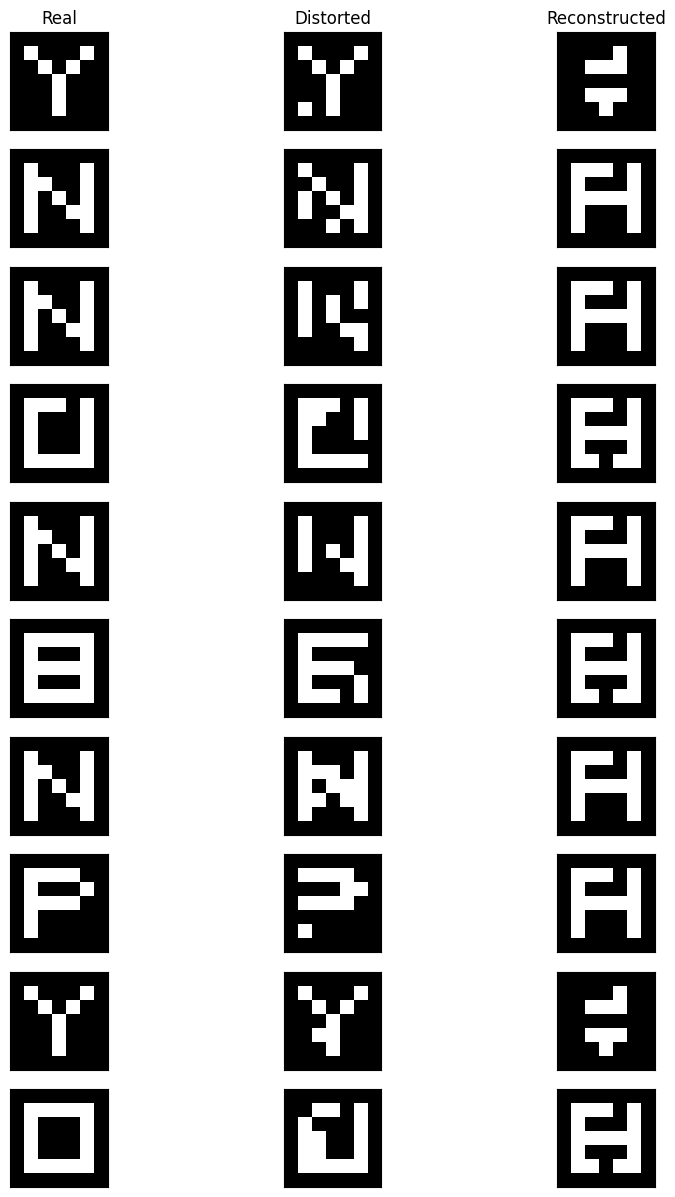

In [206]:
W = train(n_neurons, train_data)
accuracy, op_imgs = test(W, test_data)

print("Accuracy of the network is %f" % (accuracy * 100))
plot_images(op_imgs, "Reconstructed Data", n_train_disp)
plt.show()

as expected after adding just 3 more letters the complexity got too much for a hopfield network getting the accuracy of 0.00 around 9 out of 10 times